# Matrix = Calcite + Clay    
# Fluid = Water + Oil

K(Ca) = 70 GPa
G(Ca) = 30 GPa
d(Ca) = 2700 kg/m3

K(Cl) = 20 GPa
G(Cl) = 10 GPa
d(Cl) = 2500 kg/m3

V(Ca):V(Cl) = 80:20

K(w) = 2.0 GPa     
G(w) = 0 GPa
d(w) = 1000 kg/m3

K(o) = 1.5 GPa
G(o) = 0 GPa
d(o) = 750 kg/m3

Sw = 0.6

critical_porosity = 0.4

In [1]:
# Calcite
Kca = 70
Gca = 30
dCa = 2700 
Vca = 0.8

# Clay
Kcl = 20
Gcl = 10
dCl = 2500
Vcl = 1-Vca

# Water
Kw = 2
Gw = 0
dw = 1000
Sw = 0.6

# Oil
Ko = 1.5
Go = 0
do = 750
So = 1-Sw

critical_porosity = 0.4


In [2]:
import numpy as np

porosities = np.arange(0.0, 1.01, 0.01)
print(porosities)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


In [3]:
dmin = Vca*dCa + Vcl*dCl
dfluid = Sw*dw + So*do
davg = (1-porosities)*dmin + porosities*dfluid
print(davg)

[2660.  2642.4 2624.8 2607.2 2589.6 2572.  2554.4 2536.8 2519.2 2501.6
 2484.  2466.4 2448.8 2431.2 2413.6 2396.  2378.4 2360.8 2343.2 2325.6
 2308.  2290.4 2272.8 2255.2 2237.6 2220.  2202.4 2184.8 2167.2 2149.6
 2132.  2114.4 2096.8 2079.2 2061.6 2044.  2026.4 2008.8 1991.2 1973.6
 1956.  1938.4 1920.8 1903.2 1885.6 1868.  1850.4 1832.8 1815.2 1797.6
 1780.  1762.4 1744.8 1727.2 1709.6 1692.  1674.4 1656.8 1639.2 1621.6
 1604.  1586.4 1568.8 1551.2 1533.6 1516.  1498.4 1480.8 1463.2 1445.6
 1428.  1410.4 1392.8 1375.2 1357.6 1340.  1322.4 1304.8 1287.2 1269.6
 1252.  1234.4 1216.8 1199.2 1181.6 1164.  1146.4 1128.8 1111.2 1093.6
 1076.  1058.4 1040.8 1023.2 1005.6  988.   970.4  952.8  935.2  917.6
  900. ]


## Voigt and Reuss bounds

In [4]:
Kv_min = Kcl*Vcl + Kca*Vca
Gv_min = Gcl*Vcl + Gca*Vca

Kr_min = 1/(Vcl/Kcl + Vca/Kca)
Gr_min = 1/(Vcl/Gcl + Vca/Gca)

Kmin = round((Kv_min + Kr_min)/2, 2)
Gmin = round((Gv_min + Gr_min)/2, 2)

Kfl = round(1/(Sw/Kw + So/Ko),2)
Gfl = 0

In [5]:
Kv = Kmin*(1 - porosities) + Kfl*porosities
Gv = Gmin*(1 - porosities) + Gfl*porosities

Kr = 1/((1-porosities)/Kmin  + porosities/Kfl)
Gr = np.zeros_like(Kr)

Kvrh = (Kv + Kr)/2
Gvrh = (Gv + Gr)/2

In [6]:
relative_porosities = np.minimum(porosities/critical_porosity, 1.0)


In [7]:
Kv_mod = Kmin*(1 - relative_porosities) + Kfl*relative_porosities
Gv_mod = Gmin*(1 - relative_porosities) + Gfl*relative_porosities

Kr_mod = 1/((1-relative_porosities)/Kmin  + relative_porosities/Kfl)
Gr_mod = np.zeros_like(Kr_mod)

Kvrh_mod = (Kv_mod + Kr_mod)/2
Gvrh_mod = (Gv_mod + Gr_mod)/2

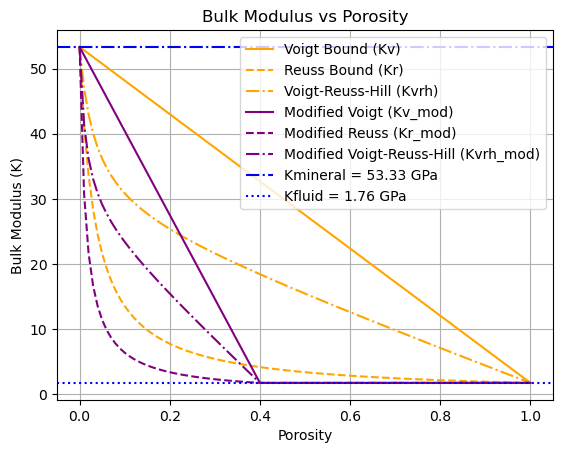

In [8]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))

# Plotting the bulk modulus values
plt.plot(porosities, Kv, label='Voigt Bound (Kv)', linestyle='-', color='orange')
plt.plot(porosities, Kr, label='Reuss Bound (Kr)', linestyle='--', color='orange')
plt.plot(porosities, Kvrh, label='Voigt-Reuss-Hill (Kvrh)', linestyle='-.', color='orange')
plt.plot(porosities, Kv_mod, label='Modified Voigt (Kv_mod)', linestyle='-', color='purple')
plt.plot(porosities, Kr_mod, label='Modified Reuss (Kr_mod)', linestyle='--', color='purple')
plt.plot(porosities, Kvrh_mod, label='Modified Voigt-Reuss-Hill (Kvrh_mod)', linestyle='-.', color='purple')

# Mark and indicate Kmin and Gfl
plt.axhline(y=Kmin, color='blue', linestyle='-.', linewidth=1.5, label=f'Kmineral = {Kmin} GPa')
plt.axhline(y=Kfl, color='blue', linestyle=':', linewidth=1.5, label=f'Kfluid = {Kfl} GPa')


# Adding labels, title, and legend
plt.xlabel('Porosity')
plt.ylabel('Bulk Modulus (K)')
plt.title('Bulk Modulus vs Porosity')
plt.legend()
plt.grid(True)
plt.show()

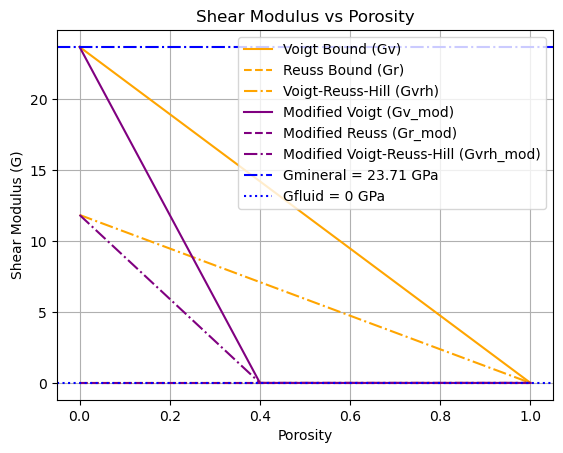

In [9]:
# Plotting the shear modulus values
plt.plot(porosities, Gv, label='Voigt Bound (Gv)', linestyle='-', color='orange')
plt.plot(porosities, Gr, label='Reuss Bound (Gr)', linestyle='--', color='orange')
plt.plot(porosities, Gvrh, label='Voigt-Reuss-Hill (Gvrh)', linestyle='-.', color='orange')
plt.plot(porosities, Gv_mod, label='Modified Voigt (Gv_mod)', linestyle='-', color='purple')
plt.plot(porosities, Gr_mod, label='Modified Reuss (Gr_mod)', linestyle='--', color='purple')
plt.plot(porosities, Gvrh_mod, label='Modified Voigt-Reuss-Hill (Gvrh_mod)', linestyle='-.', color='purple')

# Mark and indicate Gmin and Gfl
plt.axhline(y=Gmin, color='blue', linestyle='-.', linewidth=1.5, label=f'Gmineral = {Gmin} GPa')
plt.axhline(y=Gfl, color='blue', linestyle=':', linewidth=1.5, label=f'Gfluid = {Gfl} GPa')

# Adding labels, title, and legend
plt.xlabel('Porosity')
plt.ylabel('Shear Modulus (G)')
plt.title('Shear Modulus vs Porosity')
plt.legend()
plt.grid(True)
plt.show()

## Hashin-Shtrikman Bound

In [10]:
K1 = Kmin
K2 = Kfl
G1 = Gmin
G2 = Gfl
f2 = porosities
f1 = 1 - f2

In [11]:
KHS_upper = K1 + (f2 / (1/(K2 - K1) + f1/(K1 + 4/3*G1)))

GHS_upper = G1 + (f2 / (1/(G2 - G1) + 2*f1*(K1 + 2*G1)/(5*G1*(K1 + 4/3*G1))))

In [12]:
f2_mod = relative_porosities
f1_mod = 1 - f2_mod

In [13]:
KHS_upper_mod = K1 + (f2_mod / (1/(K2 - K1) + f1_mod/(K1 + 4/3*G1)))

GHS_upper_mod = G1 + (f2_mod / (1/(G2 - G1) + 2*f1_mod*(K1 + 2*G1)/(5*G1*(K1 + 4/3*G1))))

In [14]:
K1, K2 = K2, K1
G1, G2 = G2, G1
f1, f2 = f2, f1
f1_mod, f2_mod = f2_mod, f1_mod

In [15]:
KHS_lower = K1 + (f2 / (1/(K2 - K1) + f1/(K1 + 4/3*G1)))

GHS_lower = np.zeros_like(KHS_lower)

In [16]:
KHS_lower_mod = K1 + (f2_mod / (1/(K2 - K1) + f1_mod/(K1 + 4/3*G1)))
GHS_lower_mod = np.zeros_like(KHS_lower_mod)

In [17]:
KHS_avg = (KHS_upper + KHS_lower)/2
GHS_avg = (GHS_upper + GHS_lower)/2
KHS_avg_mod = (KHS_upper_mod + KHS_lower_mod)/2
GHS_avg_mod = (GHS_upper_mod + GHS_lower_mod)/2

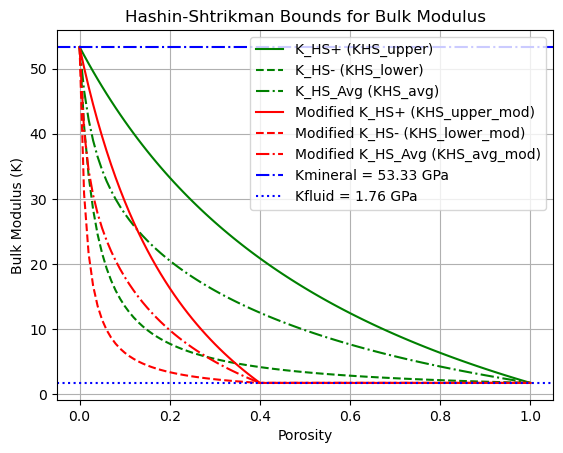

In [18]:
# Plotting the Hashin-Shtrikman bounds for bulk modulus
plt.plot(porosities, KHS_upper, label='K_HS+ (KHS_upper)', linestyle='-', color='green')
plt.plot(porosities, KHS_lower, label='K_HS- (KHS_lower)', linestyle='--', color='green')
plt.plot(porosities, KHS_avg, label='K_HS_Avg (KHS_avg)', linestyle='-.', color='green')
plt.plot(porosities, KHS_upper_mod, label='Modified K_HS+ (KHS_upper_mod)', linestyle='-', color='red')
plt.plot(porosities, KHS_lower_mod, label='Modified K_HS- (KHS_lower_mod)', linestyle='--', color='red')
plt.plot(porosities, KHS_avg_mod, label='Modified K_HS_Avg (KHS_avg_mod)', linestyle='-.', color='red')

plt.axhline(y=Kmin, color='blue', linestyle='-.', linewidth=1.5, label=f'Kmineral = {Kmin} GPa')
plt.axhline(y=Kfl, color='blue', linestyle=':', linewidth=1.5, label=f'Kfluid = {Kfl} GPa')

# Adding labels, title, and legend
plt.xlabel('Porosity')
plt.ylabel('Bulk Modulus (K)')
plt.title('Hashin-Shtrikman Bounds for Bulk Modulus')
plt.legend()
plt.grid(True)
plt.show()

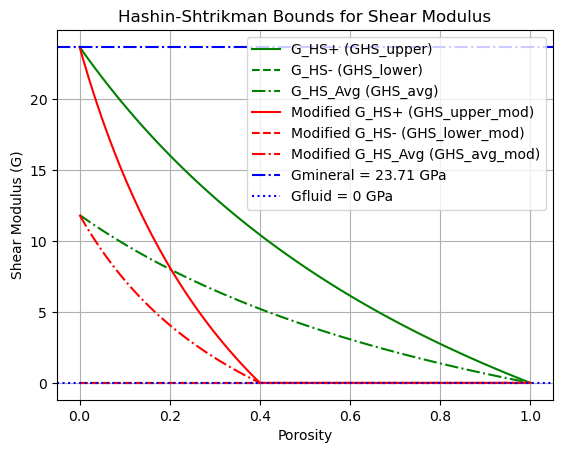

In [19]:
# Plotting the Hashin-Shtrikman bounds for shear modulus
plt.plot(porosities, GHS_upper, label='G_HS+ (GHS_upper)', linestyle='-', color='green')
plt.plot(porosities, GHS_lower, label='G_HS- (GHS_lower)', linestyle='--', color='green')
plt.plot(porosities, GHS_avg, label='G_HS_Avg (GHS_avg)', linestyle='-.', color='green')
plt.plot(porosities, GHS_upper_mod, label='Modified G_HS+ (GHS_upper_mod)', linestyle='-', color='red')
plt.plot(porosities, GHS_lower_mod, label='Modified G_HS- (GHS_lower_mod)', linestyle='--', color='red')
plt.plot(porosities, GHS_avg_mod, label='Modified G_HS_Avg (GHS_avg_mod)', linestyle='-.', color='red')

plt.axhline(y=Gmin, color='blue', linestyle='-.', linewidth=1.5, label=f'Gmineral = {Gmin} GPa')
plt.axhline(y=Gfl, color='blue', linestyle=':', linewidth=1.5, label=f'Gfluid = {Gfl} GPa')

# Adding labels, title, and legend
plt.xlabel('Porosity')
plt.ylabel('Shear Modulus (G)')
plt.title('Hashin-Shtrikman Bounds for Shear Modulus')
plt.legend()
plt.grid(True)
plt.show()